Step 1: Importing Python libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Importing Customed Stock Dataset

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns = 'Unnamed: 0', inplace = True)
stocks

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
0,1997-05-15,Amazon,1443120000,0.0979,0.1219,0.1250,0.0964,NaN,NaN
1,1997-05-16,Amazon,294000000,0.0865,0.0984,0.0990,0.0854,NaN,NaN
2,1997-05-19,Amazon,122136000,0.0854,0.0880,0.0885,0.0812,NaN,NaN
3,1997-05-20,Amazon,109344000,0.0818,0.0865,0.0875,0.0818,NaN,NaN
4,1997-05-21,Amazon,377064000,0.0714,0.0818,0.0823,0.0688,NaN,NaN
...,...,...,...,...,...,...,...,...,...
40164,2024-11-08,Tesla,204782800,321.2200,299.1400,328.7100,297.6600,205.780929,222.445616
40165,2024-11-11,Tesla,210521600,350.0000,346.3000,358.6400,336.0000,206.629180,222.845808
40166,2024-11-12,Tesla,155726000,328.4900,342.7400,345.8400,323.3100,207.345464,223.177233
40167,2024-11-13,Tesla,125405600,330.2400,335.8500,344.6000,322.5000,208.101038,223.495781


Step 3: Descriptive Stats

In [3]:
stocks.describe()

,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
count,4.016900e+04,40169.000000,40169.000000,40169.000000,40169.000000,39077.000000,37985.000000
mean,1.377038e+08,70.875339,70.859777,71.815929,69.882067,67.491627,64.710585
std,2.208724e+08,117.300203,117.286474,118.845509,115.678682,109.060614,102.647677
min,0.000000e+00,0.049100,0.049700,0.049700,0.049100,0.071181,0.084898
25%,2.903800e+07,1.928600,1.926000,1.968000,1.893000,2.072822,2.132174
50%,6.844560e+07,19.310000,19.285500,19.578700,19.060000,19.673310,19.253567
75%,1.447900e+08,89.039000,88.930000,89.907100,87.870000,85.854508,79.809292
max,7.421641e+09,837.260000,833.670000,841.000000,830.020000,661.219672,556.620493


In [4]:
stocks.groupby('Stock_Name').describe().transpose()

Stock_Name                 Amazon         Apple          Meta     Microsoft  \
Volume        count  6.922000e+03  1.107400e+04  3.144000e+03  9.748000e+03   
              mean   1.369894e+08  3.162395e+08  2.951159e+07  5.649140e+07   
              std    1.378718e+08  3.350444e+08  2.584039e+07  3.813479e+07   
              min    9.744000e+06  0.000000e+00  5.467500e+06  2.304000e+06   
              25%    6.385850e+07  1.118510e+08  1.557388e+07  3.165135e+07   
              50%    1.012240e+08  2.041146e+08  2.184585e+07  4.965995e+07   
              75%    1.559310e+08  3.972062e+08  3.370790e+07  7.039880e+07   
              max    2.086584e+09  7.421641e+09  5.735764e+08  1.031789e+09   
Close in $    count  6.922000e+03  1.107400e+04  3.144000e+03  9.748000e+03   
              mean   3.896845e+01  2.370486e+01  1.815687e+02  6.122696e+01   
              std    5.560891e+01  4.884277e+01  1.242950e+02  9.522734e+01   
              min    6.980000e-02  4.910000e-02  1.773000e+01  9.030000e-02   
              25%    2.093125e+00  2.997250e-01  8.712000e+01  5.812500e+00   
              50%    8.876250e+00  5.380500e-01  1.646600e+02  2.742250e+01   
              75%    5.964225e+01  2.093353e+01  2.368050e+02  4.718812e+01   
              max    2.141000e+02  2.364800e+02  5.959400e+02  4.675600e+02   
Open in $     count  6.922000e+03  1.107400e+04  3.144000e+03  9.748000e+03   
              mean   3.897698e+01  2.368874e+01  1.814894e+02  6.121592e+01   
              std    5.563240e+01  4.880129e+01  1.242655e+02  9.522130e+01   
              min    7.030000e-02  4.970000e-02  1.808000e+01  8.850000e-02   
              25%    2.086750e+00  2.991000e-01  8.683000e+01  5.804700e+00   
              50%    8.887500e+00  5.379000e-01  1.646100e+02  2.738000e+01   
              75%    5.968625e+01  2.101910e+01  2.369750e+02  4.720470e+01   
              max    2.141600e+02  2.364800e+02  6.009800e+02  4.670000e+02   
High in $     count  6.922000e+03  1.107400e+04  3.144000e+03  9.748000e+03   
              mean   3.943355e+01  2.394181e+01  1.838249e+02  6.183648e+01   
              std    5.625677e+01  4.931564e+01  1.257835e+02  9.608012e+01   
              min    7.240000e-02  4.970000e-02  1.827000e+01  9.200000e-02   
              25%    2.135125e+00  3.058000e-01  8.792500e+01  5.888650e+00   
              50%    8.973750e+00  5.469000e-01  1.667500e+02  2.772000e+01   
              75%    6.013525e+01  2.122747e+01  2.402775e+02  4.767250e+01   
              max    2.159000e+02  2.374900e+02  6.029500e+02  4.683500e+02   
Low in $      count  6.922000e+03  1.107400e+04  3.144000e+03  9.748000e+03   
              mean   3.848104e+01  2.344608e+01  1.792143e+02  6.057194e+01   
              std    5.494553e+01  4.831930e+01  1.227441e+02  9.428582e+01   
              min    6.560000e-02  4.910000e-02  1.755000e+01  8.850000e-02   
              25%    2.050125e+00  2.924000e-01  8.570250e+01  5.718800e+00   
              50%    8.764250e+00  5.298500e-01  1.621500e+02  2.715810e+01   
              75%    5.936600e+01  2.073870e+01  2.326275e+02  4.660000e+01   
              max    2.108800e+02  2.344500e+02  5.899600e+02  4.644600e+02   
MA_Six_Months count  6.740000e+03  1.089200e+04  2.962000e+03  9.566000e+03   
              mean   3.750634e+01  2.228064e+01  1.756121e+02  5.835927e+01   
              std    5.301555e+01  4.560709e+01  1.045088e+02  8.867104e+01   
              min    1.671361e-01  7.118087e-02  2.465333e+01  1.118645e-01   
              25%    2.133750e+00  3.180877e-01  9.360168e+01  6.009052e+00   
              50%    8.958549e+00  5.093667e-01  1.662523e+02  2.708801e+01   
              75%    5.620605e+01  2.024370e+01  2.296575e+02  4.543598e+01   
              max    1.839756e+02  2.053460e+02  5.143083e+02  4.228114e+02   
MA_One_Year   count  6.558000e+03  1.071000e+04  2.780000e+03  9.384000e+03   
              mean   3.625400e+01  2.105074e+01  1

Step 4: Prepping for Visualizations

In [5]:
# Grabbing today's date
max_date = max(stocks['Date'])
max_date

'2024-11-14'

In [6]:
# Filtering the dataset by using today's date
stocks_max_date = stocks[stocks['Date']==max_date]
stocks_max_date

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
6921,2024-11-14,Amazon,42620300,211.48,214.16,215.90,210.88,183.975628,162.588137
17995,2024-11-14,Apple,44923900,228.22,225.02,228.87,225.00,205.345956,195.030466
21139,2024-11-14,Meta,11053700,577.16,577.00,580.76,573.01,514.308251,423.050329
30887,2024-11-14,Microsoft,30246900,426.89,425.00,428.17,420.00,422.811421,388.409452
36547,2024-11-14,Netflix,3038200,837.26,833.67,841.00,830.02,661.219672,556.620493
40168,2024-11-14,Tesla,120726100,311.18,327.69,329.98,310.37,208.711858,223.752137


Text(0.5, 1.0, 'Shares Traded per Stock For Today')

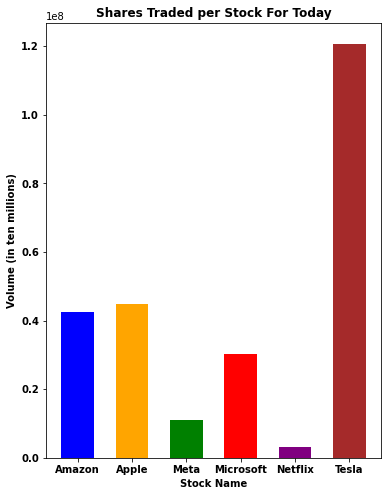

In [7]:
shares_volume = plt.figure(figsize=(6,8))
colors = ['blue','orange','green','red','purple','brown']
plt.bar(stocks_max_date['Stock_Name'], stocks_max_date['Volume'],
        color = colors, width = 0.6),
plt.xlabel('Stock Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('Volume (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.title('Shares Traded per Stock For Today', fontsize = 12, fontweight = 'bold')

In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks.set_index('Date')
stocks

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1997-05-15,Amazon,1443120000,0.0979,0.1219,0.1250,0.0964,NaN,NaN
1997-05-16,Amazon,294000000,0.0865,0.0984,0.0990,0.0854,NaN,NaN
1997-05-19,Amazon,122136000,0.0854,0.0880,0.0885,0.0812,NaN,NaN
1997-05-20,Amazon,109344000,0.0818,0.0865,0.0875,0.0818,NaN,NaN
1997-05-21,Amazon,377064000,0.0714,0.0818,0.0823,0.0688,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-11-08,Tesla,204782800,321.2200,299.1400,328.7100,297.6600,205.780929,222.445616
2024-11-11,Tesla,210521600,350.0000,346.3000,358.6400,336.0000,206.629180,222.845808
2024-11-12,Tesla,155726000,328.4900,342.7400,345.8400,323.3100,207.345464,223.177233


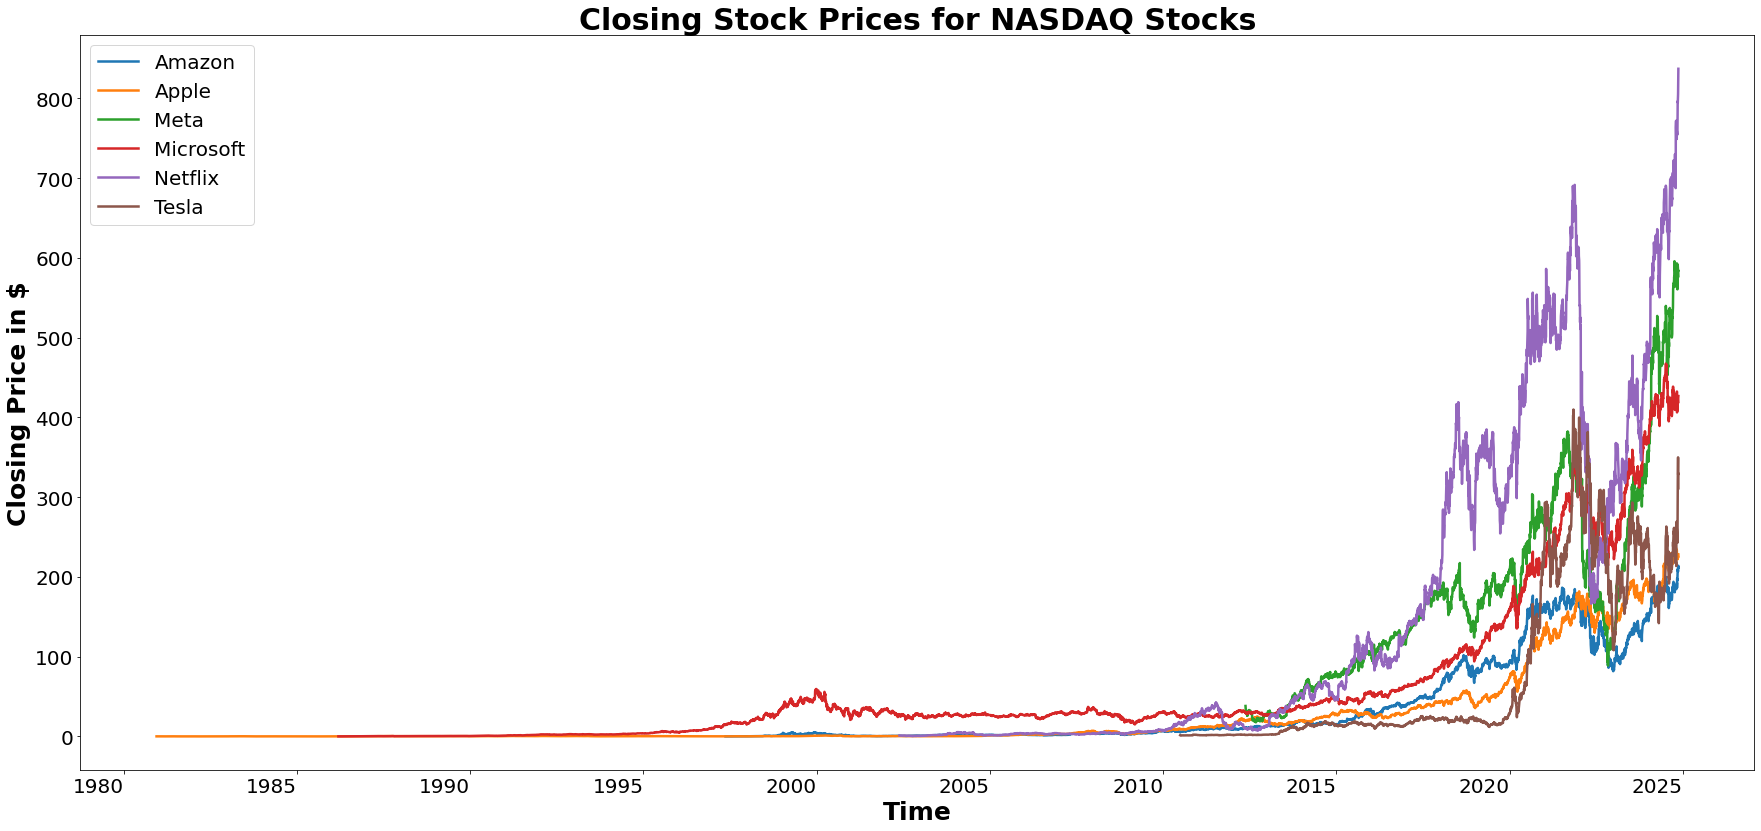

In [9]:
#Using a line chart to graph closing price of stocks within a 10 year frame
six_stocks_ten_years = plt.figure(figsize=(30,15))
stocks.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5)
plt.title('Closing Stock Prices for NASDAQ Stocks', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 900, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [10]:
# Breaking dataset into multiple where each one is assigned to one specific stock, prepping for moving average analysis

In [11]:
moving_average = stocks[stocks['MA_One_Year'].notna()]
moving_average

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1998-10-23,Amazon,272496000,0.9677,0.9542,0.9859,0.9510,0.617291,0.392595
1998-10-26,Amazon,390336000,1.0120,0.9927,1.0156,0.9729,0.621438,0.395099
1998-10-27,Amazon,403284000,0.9693,1.0344,1.0500,0.9672,0.625385,0.397518
1998-10-28,Amazon,397836000,0.9755,0.9745,0.9958,0.9521,0.629375,0.399956
1998-10-29,Amazon,658644000,1.0542,1.0109,1.0604,0.9917,0.633810,0.402620
...,...,...,...,...,...,...,...,...
2024-11-08,Tesla,204782800,321.2200,299.1400,328.7100,297.6600,205.780929,222.445616
2024-11-11,Tesla,210521600,350.0000,346.3000,358.6400,336.0000,206.629180,222.845808
2024-11-12,Tesla,155726000,328.4900,342.7400,345.8400,323.3100,207.345464,223.177233


In [12]:
moving_average_amazon_stock = moving_average[moving_average['Stock_Name']=='Amazon']
moving_average_amazon_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1998-10-23,Amazon,272496000,0.9677,0.9542,0.9859,0.9510,0.617291,0.392595
1998-10-26,Amazon,390336000,1.0120,0.9927,1.0156,0.9729,0.621438,0.395099
1998-10-27,Amazon,403284000,0.9693,1.0344,1.0500,0.9672,0.625385,0.397518
1998-10-28,Amazon,397836000,0.9755,0.9745,0.9958,0.9521,0.629375,0.399956
1998-10-29,Amazon,658644000,1.0542,1.0109,1.0604,0.9917,0.633810,0.402620
...,...,...,...,...,...,...,...,...
2024-11-08,Amazon,36075800,208.1800,209.7200,209.9600,207.4400,183.164481,161.633534
2024-11-11,Amazon,35456000,206.8400,208.5000,209.6500,205.5900,183.373497,161.869863
2024-11-12,Amazon,38942900,208.9100,208.3700,209.5400,206.0100,183.561093,162.105863


In [13]:
moving_average_apple_stock = moving_average[moving_average['Stock_Name']=='Apple']
moving_average_apple_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1982-05-24,Apple,31987200,0.0642,0.0642,0.0647,0.0642,0.080626,0.101125
1982-05-25,Apple,51564800,0.0642,0.0642,0.0647,0.0642,0.080446,0.100949
1982-05-26,Apple,43276800,0.0636,0.0642,0.0642,0.0636,0.080290,0.100790
1982-05-27,Apple,31248000,0.0625,0.0631,0.0631,0.0625,0.080134,0.100653
1982-05-28,Apple,19196800,0.0625,0.0625,0.0631,0.0625,0.079994,0.100507
...,...,...,...,...,...,...,...,...
2024-11-08,Apple,38328800,226.9600,227.1700,228.6600,226.4100,204.409180,194.526548
2024-11-11,Apple,42005600,224.2300,225.0000,225.7000,221.5000,204.638197,194.655260
2024-11-12,Apple,40398300,224.2300,224.5500,225.5900,223.3600,204.856011,194.776192


In [14]:
moving_average_meta_stock = moving_average[moving_average['Stock_Name']=='Meta']
moving_average_meta_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2013-10-30,Meta,127073000,49.01,50.00,50.21,48.75,32.949672,29.215945
2013-10-31,Meta,248809000,50.21,47.16,52.00,46.50,33.069617,29.248767
2013-11-01,Meta,95033000,49.75,50.85,52.09,49.72,33.191913,29.291836
2013-11-04,Meta,80371000,48.22,49.37,49.75,48.02,33.302896,29.339014
2013-11-05,Meta,76835000,50.11,47.79,50.18,47.51,33.420984,29.388630
...,...,...,...,...,...,...,...,...
2024-11-08,Meta,9415700,589.34,591.54,593.10,584.52,512.093934,419.642603
2024-11-11,Meta,10209100,583.17,586.36,587.00,576.51,512.723115,420.515068
2024-11-12,Meta,16287700,584.82,588.54,599.66,580.38,513.262404,421.370438


In [15]:
moving_average_microsoft_stock = moving_average[moving_average['Stock_Name']=='Microsoft']
moving_average_microsoft_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1987-08-20,Microsoft,82051200,0.3655,0.3559,0.3672,0.3559,0.301766,0.206918
1987-08-21,Microsoft,68976000,0.3715,0.3646,0.3759,0.3646,0.302870,0.207669
1987-08-24,Microsoft,97747200,0.3880,0.3715,0.3898,0.3663,0.304061,0.208456
1987-08-25,Microsoft,185961600,0.3984,0.3915,0.4054,0.3872,0.305316,0.209267
1987-08-26,Microsoft,114105600,0.4010,0.3984,0.4097,0.3967,0.306573,0.210093
...,...,...,...,...,...,...,...,...
2024-11-08,Microsoft,16891400,422.5400,425.3200,426.5000,421.7800,422.475792,387.420904
2024-11-11,Microsoft,24503300,418.0100,422.5200,424.8100,416.0000,422.562295,387.666438
2024-11-12,Microsoft,19401200,423.0300,418.2500,424.4400,417.2000,422.624481,387.914247


In [16]:
moving_average_netflix_stock = moving_average[moving_average['Stock_Name']=='Netflix']
moving_average_netflix_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2003-10-31,Netflix,16017400,4.0929,4.2029,4.2107,4.0371,1.935142,1.394786
2003-11-03,Netflix,14712600,4.1750,4.0993,4.2143,4.0857,1.952772,1.402946
2003-11-04,Netflix,15635200,4.2571,4.1464,4.3250,4.1314,1.970875,1.411295
2003-11-05,Netflix,17277400,4.1943,4.2321,4.2850,4.1393,1.988237,1.419616
2003-11-06,Netflix,109594800,3.6307,3.9429,4.0486,3.5736,2.002355,1.426539
...,...,...,...,...,...,...,...,...
2024-11-08,Netflix,1910600,795.0400,797.3600,799.0600,788.6500,655.975738,551.989534
2024-11-11,Netflix,2399200,805.4400,795.9000,806.8200,795.5700,657.243989,553.113397
2024-11-12,Netflix,2814100,819.5000,807.5000,820.3700,803.7500,658.506448,554.254137


In [17]:
moving_average_tesla_stock = moving_average[moving_average['Stock_Name']=='Tesla']
moving_average_tesla_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2011-12-06,Tesla,14277000,2.3247,2.2800,2.3320,2.2687,1.818838,1.697690
2011-12-07,Tesla,10114500,2.2793,2.3087,2.3260,2.2533,1.822929,1.699571
2011-12-08,Tesla,49587000,2.0593,2.0560,2.1100,1.9740,1.825902,1.700860
2011-12-09,Tesla,18592500,2.0693,2.0360,2.0747,2.0187,1.829126,1.702519
2011-12-12,Tesla,11380500,2.0273,2.0293,2.0413,2.0013,1.832113,1.704566
...,...,...,...,...,...,...,...,...
2024-11-08,Tesla,204782800,321.2200,299.1400,328.7100,297.6600,205.780929,222.445616
2024-11-11,Tesla,210521600,350.0000,346.3000,358.6400,336.0000,206.629180,222.845808
2024-11-12,Tesla,155726000,328.4900,342.7400,345.8400,323.3100,207.345464,223.177233


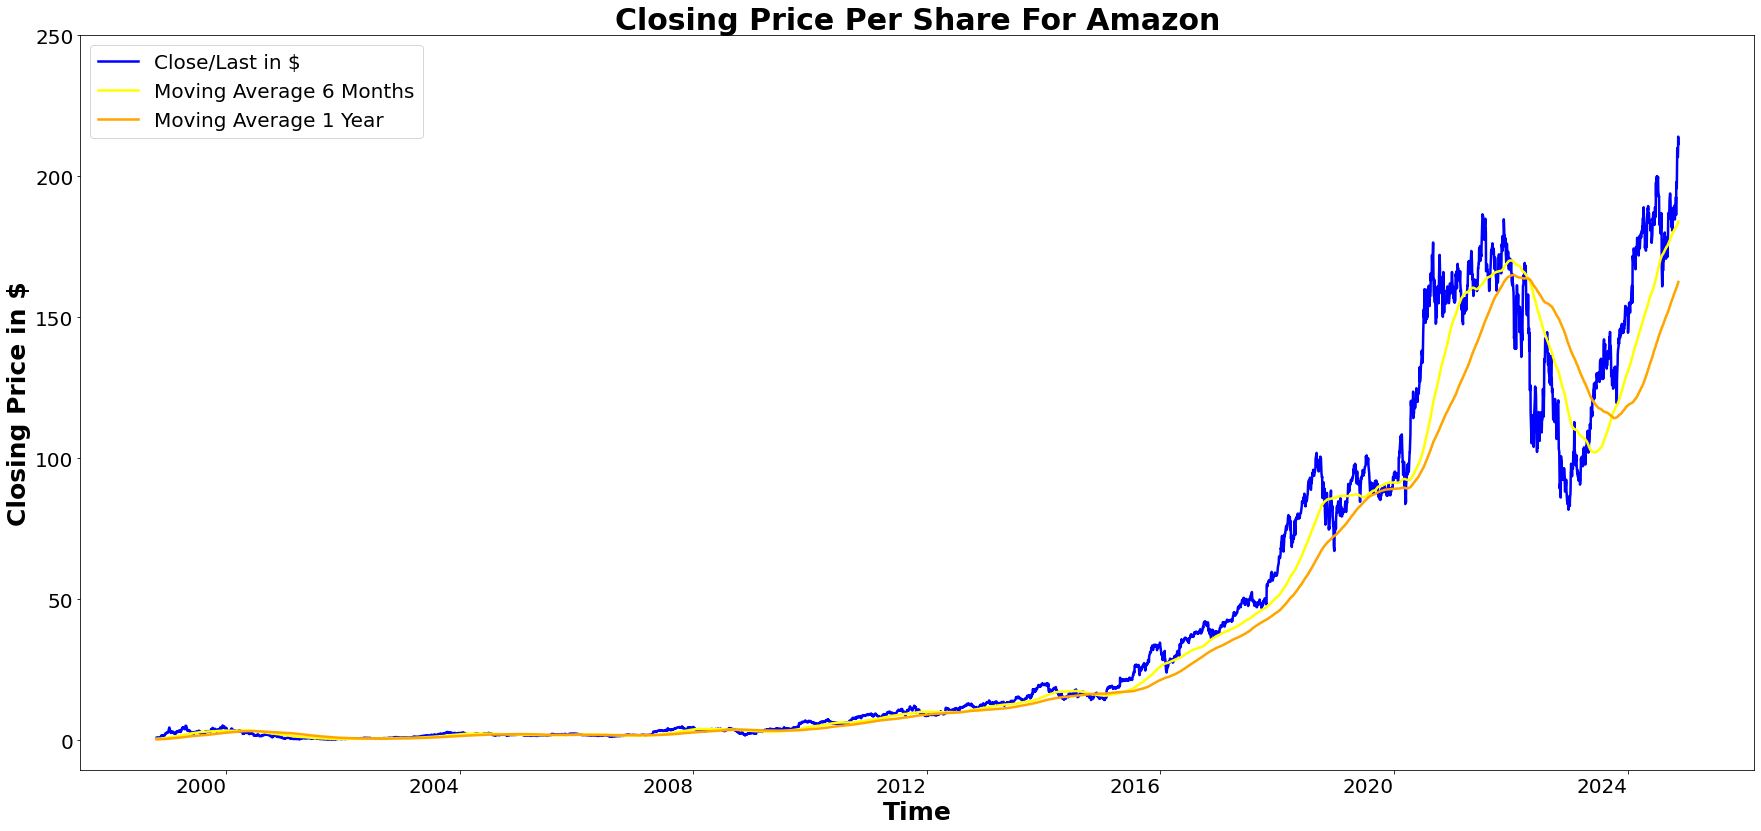

In [18]:
#Using a line chart to graph one year and five year moving averages for all stocks
amazon = plt.figure(figsize=(30,15))
moving_average_amazon_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_amazon_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_amazon_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Amazon', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

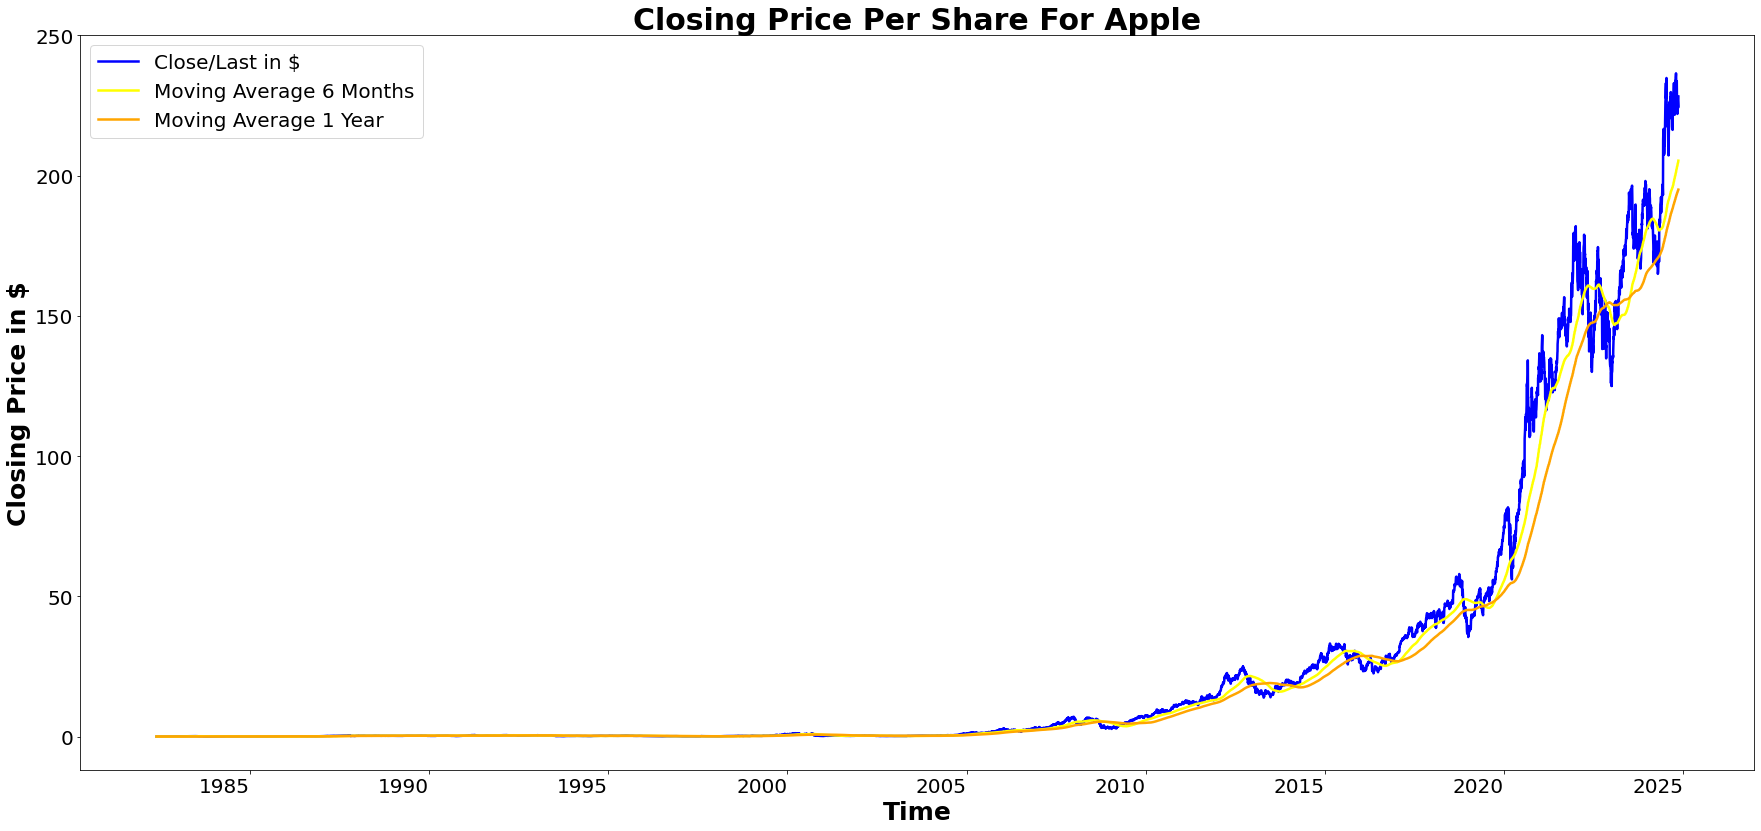

In [19]:
apple = plt.figure(figsize=(30,15))
moving_average_apple_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_apple_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_apple_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Apple', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

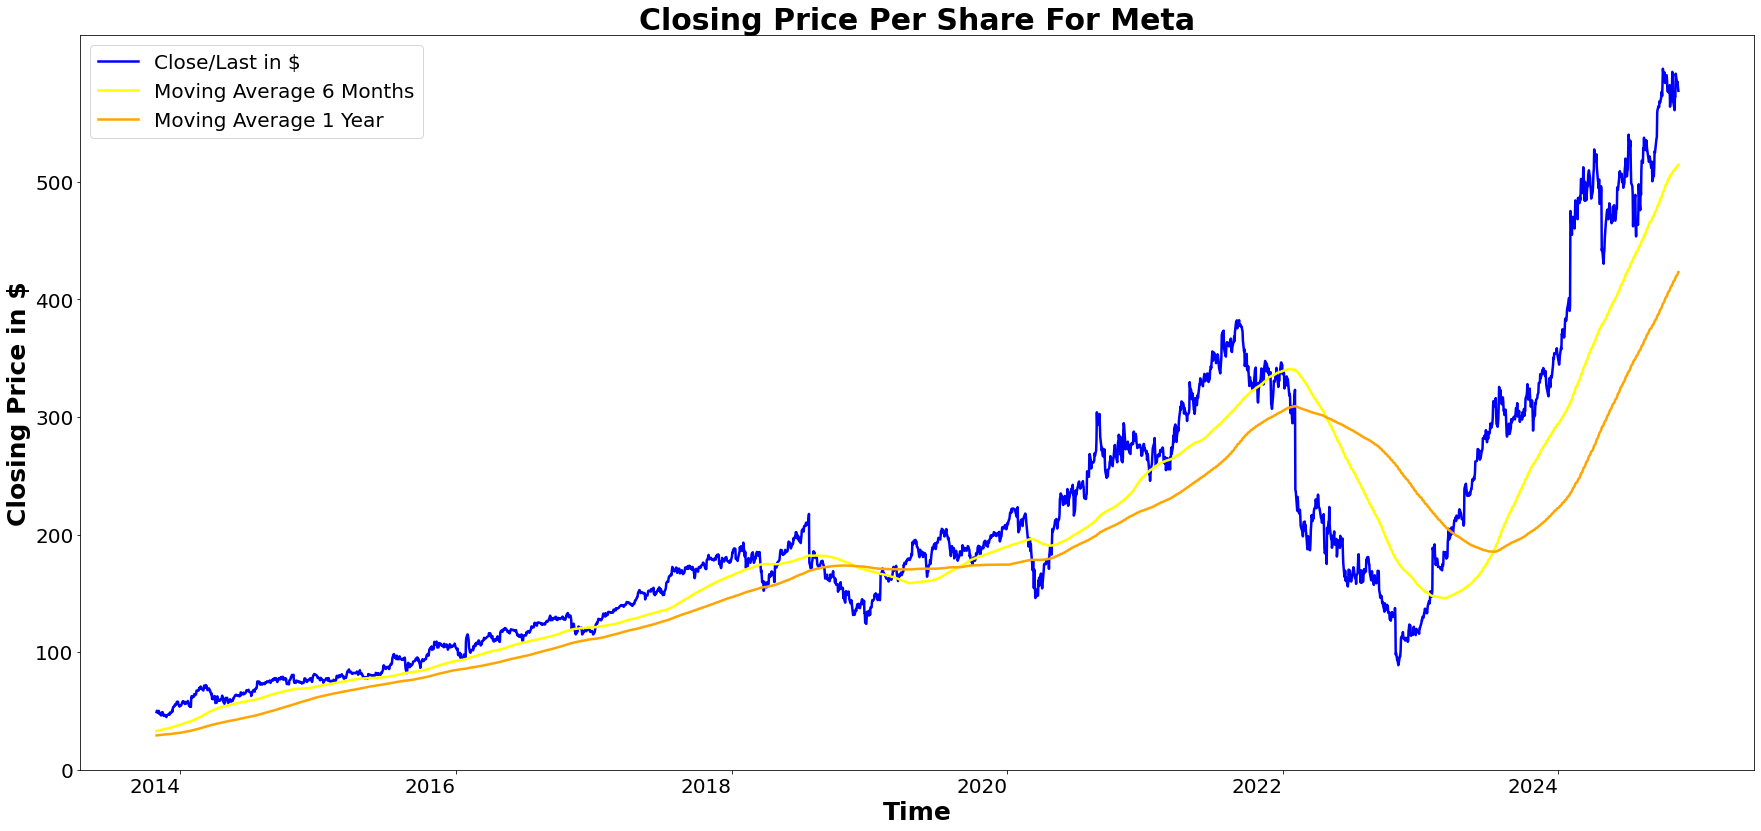

In [20]:
meta = plt.figure(figsize=(30,15))
moving_average_meta_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_meta_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_meta_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Meta', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

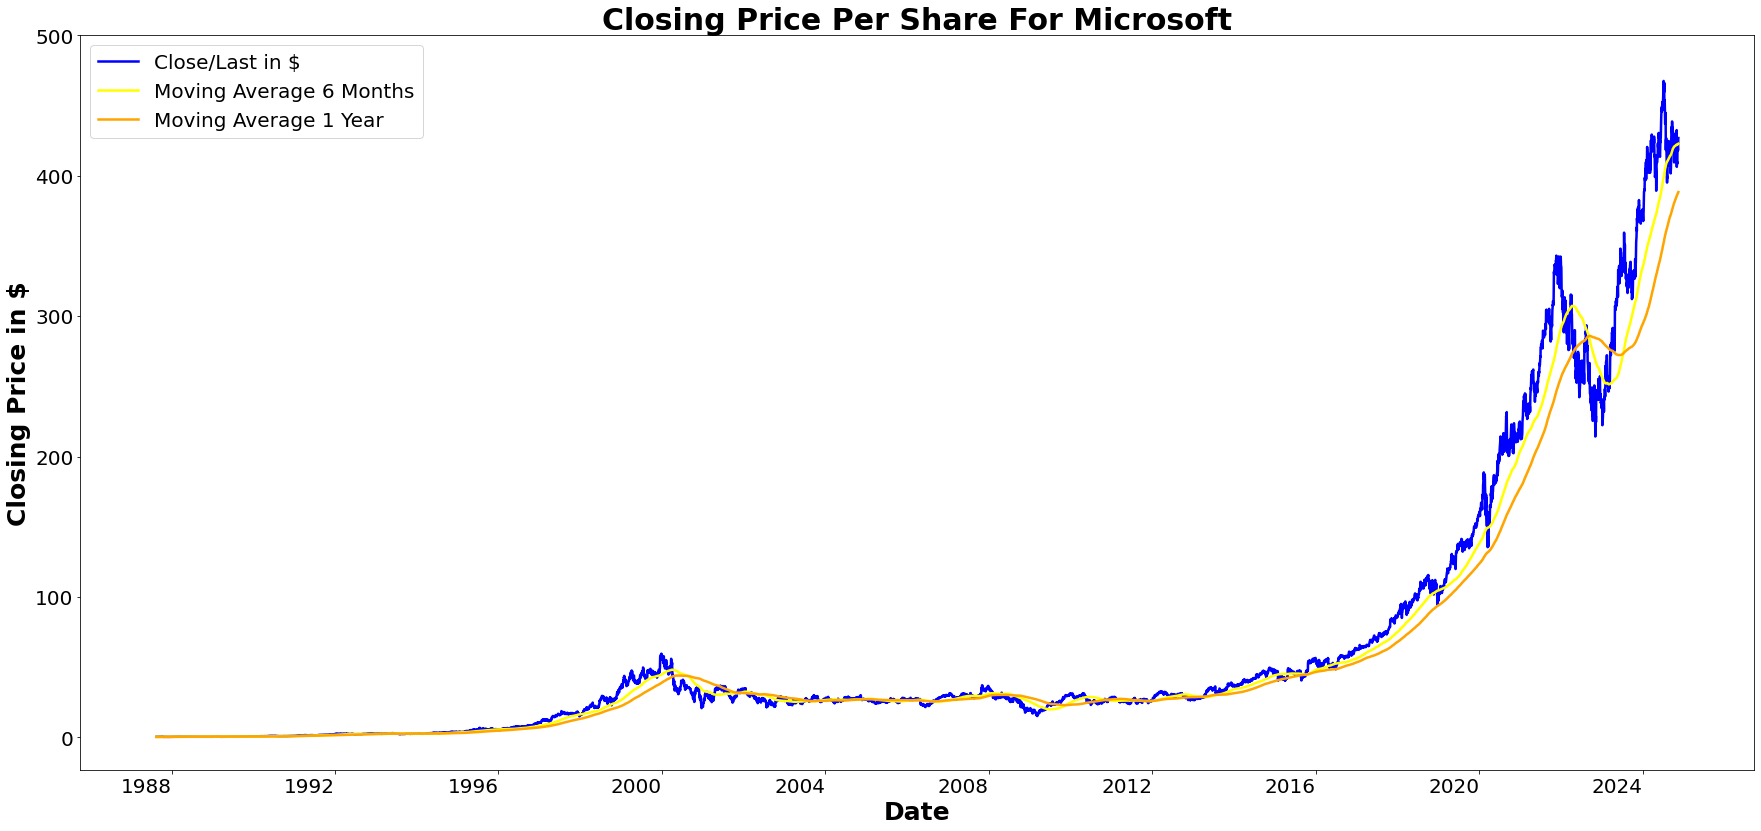

In [21]:
microsoft = plt.figure(figsize=(30,15))
moving_average_microsoft_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Microsoft', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

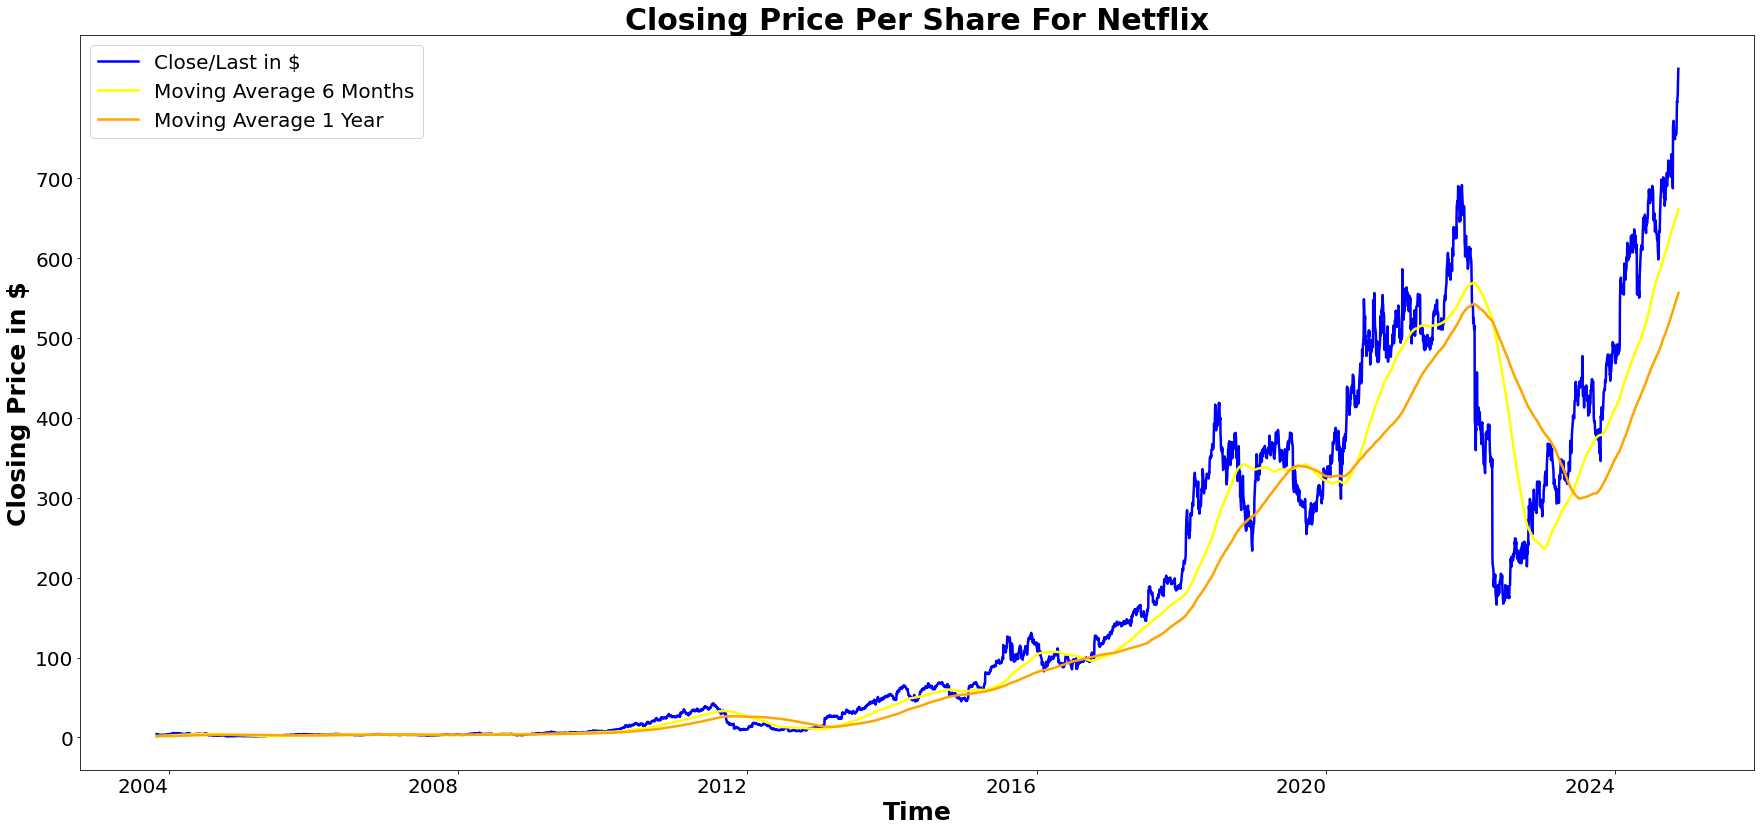

In [22]:
netflix = plt.figure(figsize=(30,15))
moving_average_netflix_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_netflix_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_netflix_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Netflix', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 800, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

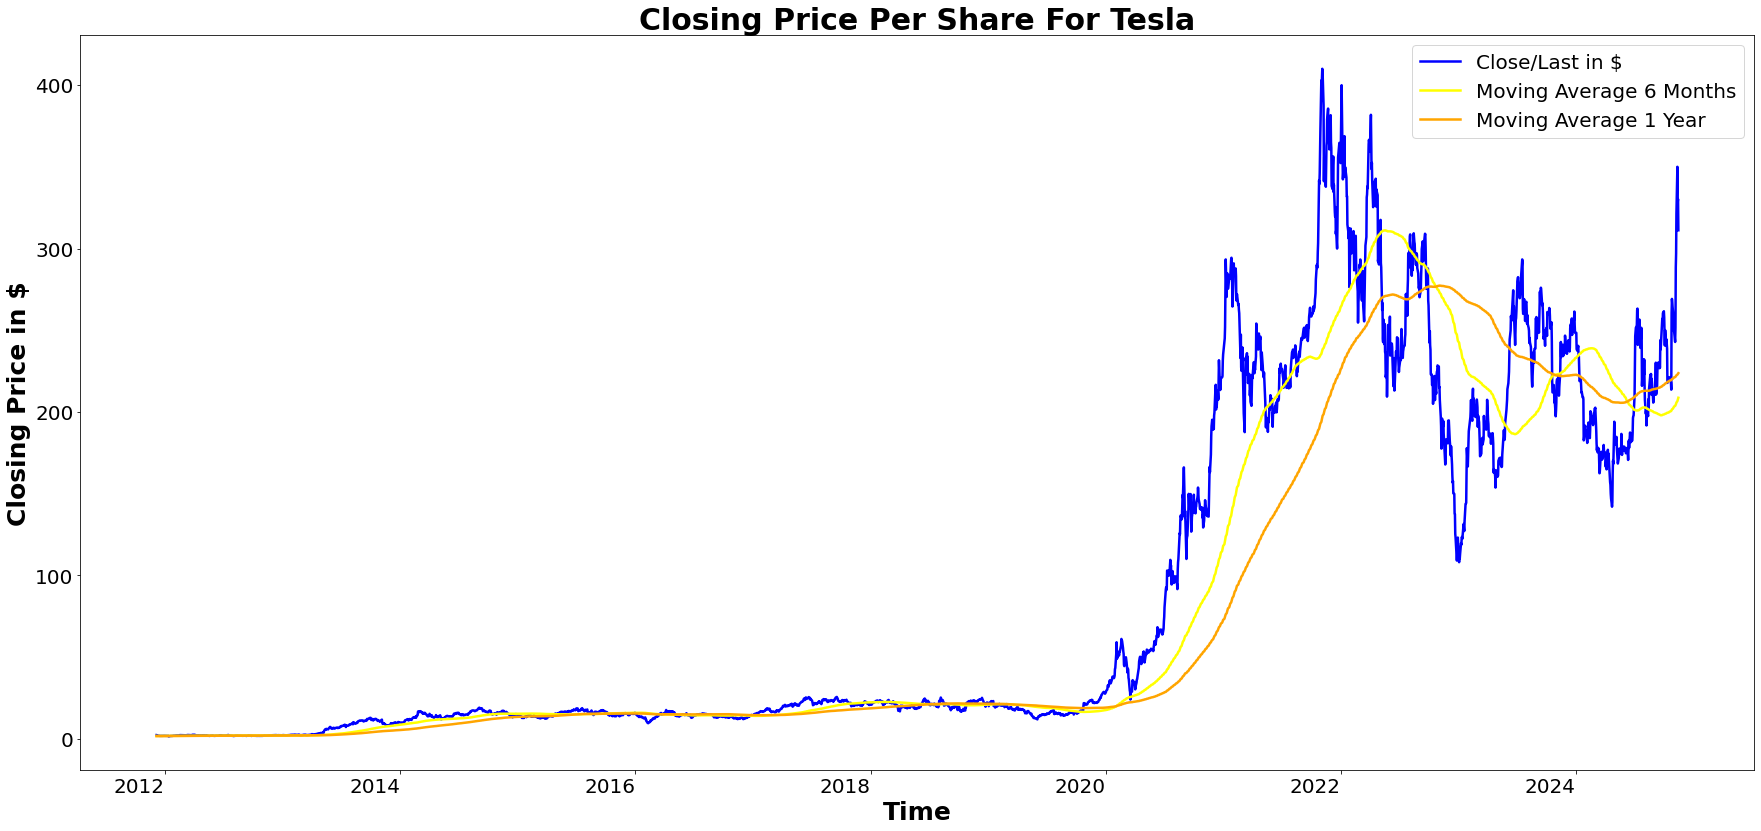

In [23]:
tesla = plt.figure(figsize=(30,15))
moving_average_tesla_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_tesla_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_tesla_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Tesla', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 500, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [24]:
shares_volume.savefig(os.path.join(path, 'Visualizations', 'shares_volume.png'))
six_stocks_ten_years.savefig(os.path.join(path, 'Visualizations', 'six_stocks_ten_years.png'))
amazon.savefig(os.path.join(path, 'Visualizations', 'amazon.png'))
apple.savefig(os.path.join(path, 'Visualizations', 'apple.png'))
meta.savefig(os.path.join(path, 'Visualizations', 'meta.png'))
microsoft.savefig(os.path.join(path, 'Visualizations', 'microsoft.png'))
netflix.savefig(os.path.join(path, 'Visualizations', 'netflix.png'))
tesla.savefig(os.path.join(path, 'Visualizations', 'tesla.png'))